In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Importing data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
emails = pd.read_csv("/content/drive/MyDrive/DA/emails.csv")

In [4]:
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
emails.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
emails.shape

(5728, 2)

Hence there are 5728 mails in the dataset

In [8]:
emails['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

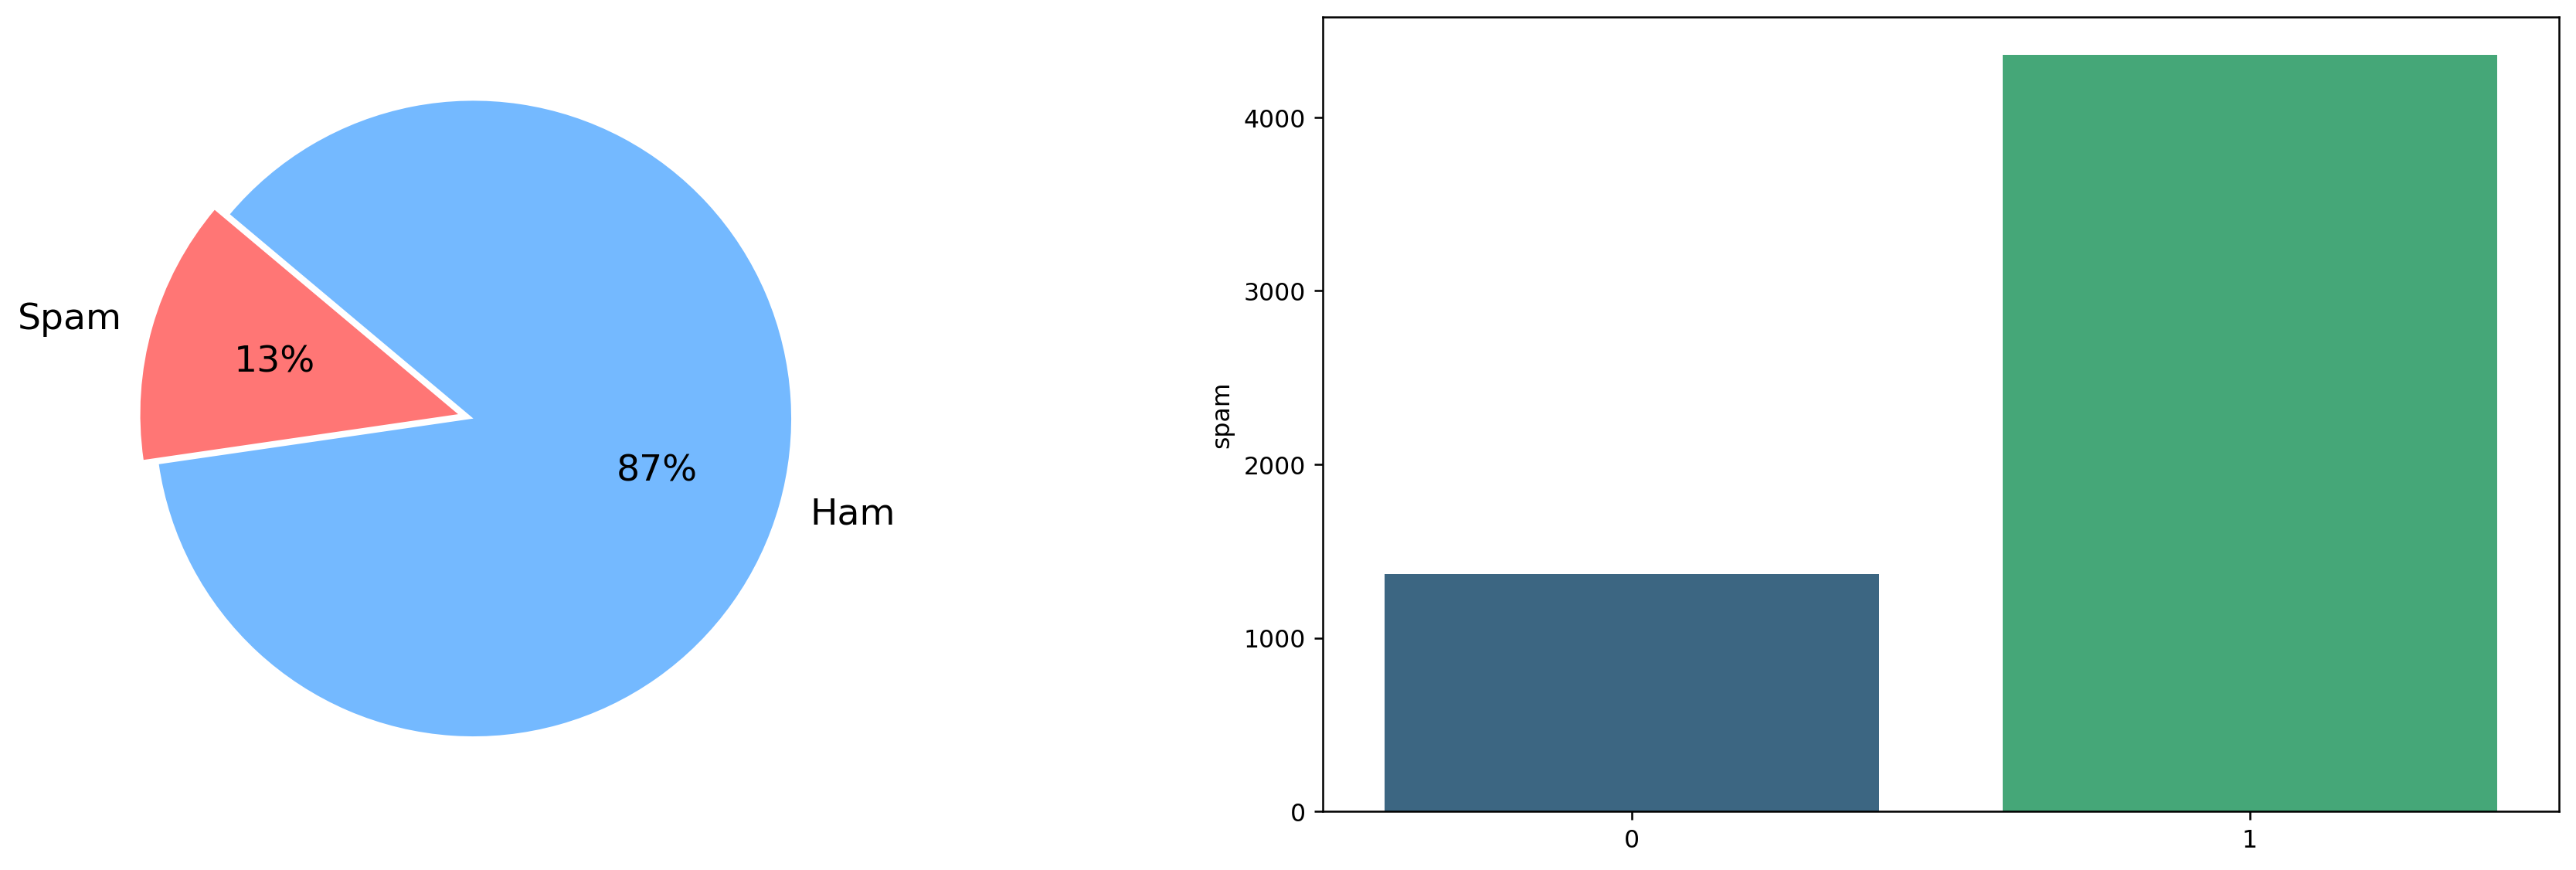

In [10]:
labels = ['Spam', 'Ham']
sizes = [747, 4825]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = emails['spam'].unique(), y = emails['spam'].value_counts(), palette= 'viridis')

plt.show()

In [11]:
emails['Total Words'] = emails['text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

def count_chars(text):
    
    return len(text)


emails['Total Chars']= emails['text'].apply(count_chars)

In [12]:
emails.head()

,text,spam,Total Words,Total Chars
0,Subject: naturally irresistible your corporate...,1,324,1484
1,Subject: the stock trading gunslinger fanny i...,1,89,598
2,Subject: unbelievable new homes made easy im ...,1,87,448
3,Subject: 4 color printing special request add...,1,98,500
4,"Subject: do not have money , get software cds ...",1,52,235


In [13]:
maxval = emails['Total Chars'].max()

 
 
print("Maximum Characters: ")
print(maxval)

Maximum Characters: 
43952


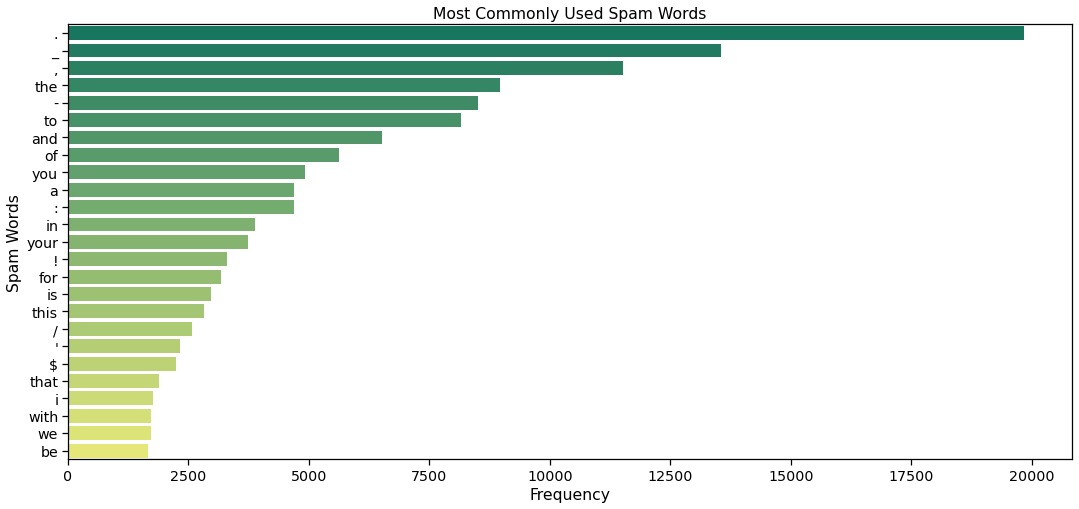

In [14]:
all_spam_words = []
for sentence in emails[emails['spam'] == 1]['text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequency")
plt.ylabel("Spam Words")
plt.show()

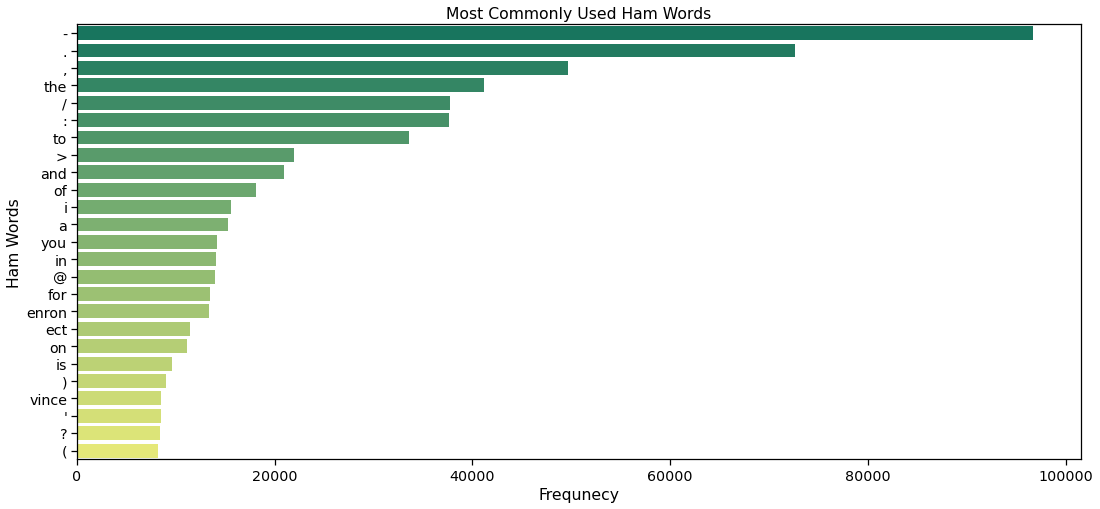

In [15]:
all_ham_words = []
for sentence in emails[emails['spam'] == 0]['text'].to_list():
    for word in sentence.split():
        all_ham_words.append(word)

df = pd.DataFrame(Counter(all_ham_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Ham Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

# Building Model

In [17]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
emails['text'] = emails['text'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#Every mail starts with 'Subject :' will remove this from each text 

emails['text']=emails['text'].map(lambda text: text[1:])
emails['text'] = emails['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
corpus=emails['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

# Creating the Bag of Words model

In [21]:
emails['corpus']=corpus

In [22]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

print(len(stopwords))

179


In [23]:
print(corpus)

0       atur irresist corpor ident lt realli hard reco...
1       stock trade gunsling fanni merril muzo colza a...
2       nbeliev new home made easi im want show homeow...
3       color print special request addit inform click...
4       money get softwar cd softwar compat great grow...
                              ...                        
5723    e research develop charg gpg forward shirley c...
5724    e receipt visit jim thank invit visit lsu shir...
5725    e enron case studi updat wow day super thank m...
5726    e interest david pleas call shirley crenshaw a...
5727    ew aurora 5 2 updat aurora version 5 2 fastest...
Name: text, Length: 5728, dtype: object


In [24]:
count=0
for i in range(5728):
    count=count+len(corpus[i].split())
print(count)

878314


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus.values).toarray()
y = emails.iloc[:, 1].values

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split( 
          X, y, test_size = 0.3, random_state = 100)

In [30]:
spamCART = DecisionTreeClassifier()

# Train Decision Tree Classifer
spamCART = spamCART.fit(X_train,y_train)
spamtrain=spamCART.predict(X_train)
#Predict the response for test dataset
y_pred =  spamCART.predict(X_test)

In [31]:
#CART train metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print('Accuracy score: ', accuracy_score(y_train, spamtrain))
print('Precision score: ', precision_score(y_train, spamtrain))
print('Recall score: ', recall_score(y_train, spamtrain))
print("F1 score: ",f1_score(y_train,spamtrain))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [32]:
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object
spamRF = RandomForestClassifier(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
spamRF=spamRF.fit(X_train,y_train)  
spamRFtrain=spamRF.predict(X_train)

In [33]:
y_pred1 = spamRF.predict(X_test)

In [34]:
#train accuracy for Spam RF

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print('Accuracy score: ', accuracy_score(y_train, spamRFtrain))
print('Precision score: ', precision_score(y_train, spamRFtrain))
print('Recall score: ', recall_score(y_train, spamRFtrain))
print("F1 score: ",f1_score(y_train,spamRFtrain))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


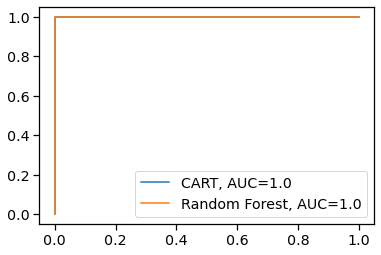

In [35]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_train,  spamtrain)
auc = round(metrics.roc_auc_score(y_train,  spamtrain), 4)
plt.plot(fpr,tpr,label="CART, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, spamRFtrain)
auc = round(metrics.roc_auc_score(y_train, spamRFtrain), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#add legend
plt.legend()

[Text(0.9112654320987654, 0.9925373134328358, 'X[28407] <= 0.5\ngini = 0.357\nsamples = 4009\nvalue = [3075, 934]'),
 Text(0.9030349794238683, 0.9776119402985075, 'X[10912] <= 0.5\ngini = 0.494\nsamples = 2097\nvalue = [1163, 934]'),
 Text(0.8948045267489712, 0.9626865671641791, 'X[5133] <= 0.5\ngini = 0.481\nsamples = 1566\nvalue = [632, 934]'),
 Text(0.8060699588477366, 0.9477611940298507, 'X[26664] <= 0.5\ngini = 0.453\nsamples = 1409\nvalue = [489, 920]'),
 Text(0.7129629629629629, 0.9328358208955224, 'X[18335] <= 0.5\ngini = 0.393\nsamples = 1142\nvalue = [307, 835]'),
 Text(0.6522633744855967, 0.917910447761194, 'X[902] <= 0.5\ngini = 0.357\nsamples = 1076\nvalue = [250, 826]'),
 Text(0.6172839506172839, 0.9029850746268657, 'X[10839] <= 0.5\ngini = 0.316\nsamples = 1011\nvalue = [199, 812]'),
 Text(0.5967078189300411, 0.8880597014925373, 'X[26344] <= 0.5\ngini = 0.287\nsamples = 974\nvalue = [169, 805]'),
 Text(0.588477366255144, 0.8731343283582089, 'X[2774] <= 0.5\ngini = 0.27\n

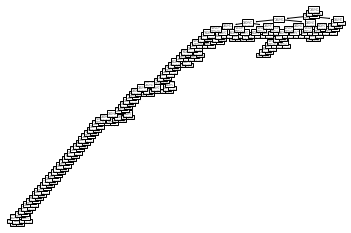

In [36]:
from sklearn import tree
tree.plot_tree(spamCART)

In [37]:
#CART train accuracy

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy score:  0.951716114019779
Precision score:  0.8926174496644296
Recall score:  0.9193548387096774
F1 score:  0.905788876276958


In [38]:
#Random Forest train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print('Accuracy score: ', accuracy_score(y_test, y_pred1))
print('Precision score: ', precision_score(y_test, y_pred1))
print('Recall score: ', recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))

Accuracy score:  0.9778941244909831
Precision score:  0.9900990099009901
Recall score:  0.9216589861751152
F1 score:  0.954653937947494


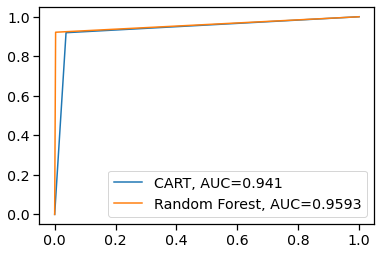

In [39]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = round(metrics.roc_auc_score(y_test,  y_pred), 4)
plt.plot(fpr,tpr,label="CART, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred1)
auc = round(metrics.roc_auc_score(y_test,  y_pred1), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#add legend
plt.legend()